In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
#import data set 
data = pd.read_csv('/Users/sky-walker/Downloads/module6_assignment_dataset.csv')
dataxfcgvbnvgcffvcvbccghbvcghjbvhj


,id,gender,age,annual_income,spending_score,perf_shop_meth,member_level
0,1,Female,48,29189.97,90,InStore,none
1,2,Female,40,10242.24,39,InStore,gold
2,3,Male,71,20388.37,48,InStore,silver
3,4,Female,72,57062.15,43,InStore,none
4,5,Agender,81,64736.13,44,InStore,gold
...,...,...,...,...,...,...,...
29995,29996,Male,64,44506.93,50,InStore,gold
29996,29997,Female,44,77084.87,41,InStore,none
29997,29998,Agender,42,75164.74,40,InStore,none
29998,29999,Female,30,42800.99,71,InStore,none


In [3]:
#standard deviation 
print(data['age'].std())
print(data['annual_income'].std())
print(data['spending_score'].std())


19.189775268218202
24845.521945332017
17.321256320025423


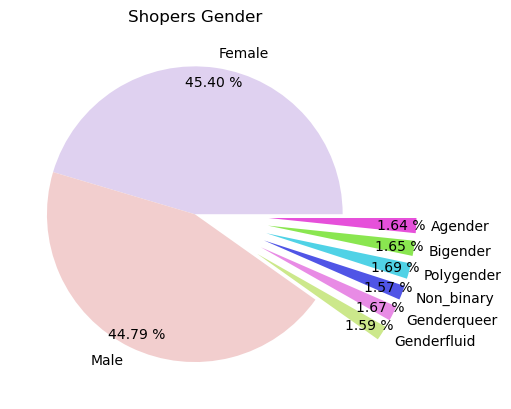

In [4]:
#visualization for gender

Female = data.loc[data['gender'] == 'Female'].count()[0]
Male = data.loc[data['gender'] == 'Male'].count()[0]
Genderfluid = data.loc[data['gender'] == 'Genderfluid'].count()[0]
Genderqueer = data.loc[data['gender'] == 'Genderqueer'].count()[0]
Non_binary = data.loc[data['gender'] == 'Non-binary'].count()[0]
Polygender = data.loc[data['gender'] == 'Polygender'].count()[0]
Bigender = data.loc[data['gender'] == 'Bigender'].count()[0]
Agender = data.loc[data['gender'] == 'Agender'].count()[0]

plt.style.use('default')
explode = (0,0,.5,.5,.5,.5,.5,.5)
labels = ['Female', 'Male', 'Genderfluid', 'Genderqueer', 'Non_binary',
         'Polygender','Bigender', 'Agender']
colors = ['#dfd1f0', '#f2cece', '#cce88b', '#e88be5', '#5055e6',
         '#50d2e6', '#8ae650', '#e650da']
plt.pie([Female, Male, Genderfluid, Genderqueer, Non_binary,
         Polygender,Bigender,Agender], labels = labels, colors = colors, autopct= 
       '%.2f %%', pctdistance=0.9, explode=explode)
plt.title('Shopers Gender')
plt.show()


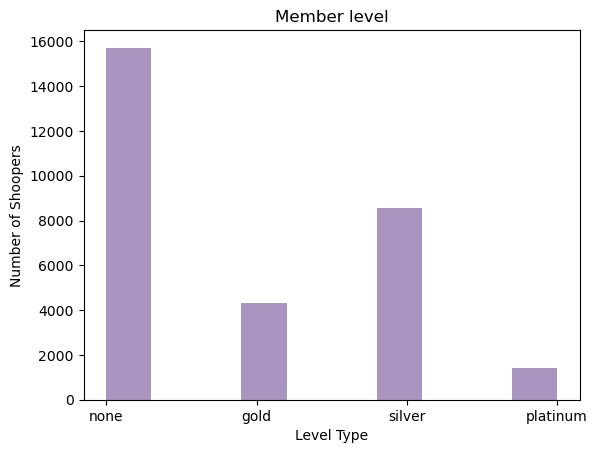

In [5]:
#visualization for memeber_level

plt.hist(data.member_level, color= '#a995bf')
plt.ylabel('Number of Shoopers')
plt.xlabel('Level Type')
plt.title('Member level')
plt.style.use('default')
plt.show()


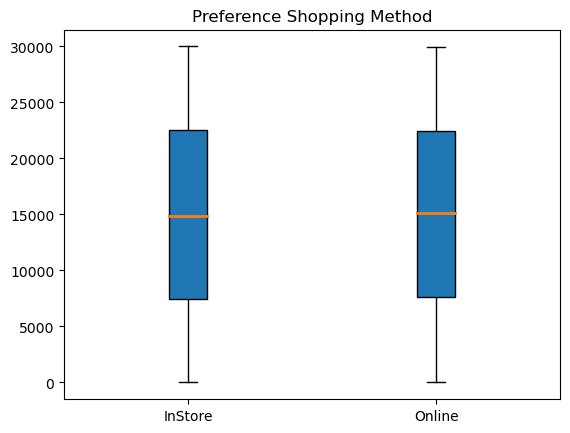

In [6]:
#visualization for perf_shop_meth 
plt.style.use('default')
InStore = data.loc[data.perf_shop_meth == 'InStore']['id']
Online = data.loc[data.perf_shop_meth == 'Online']['id']
labels = ['InStore', 'Online']
plt.title('Preference Shopping Method')
boxes = plt.boxplot([InStore, Online], labels=labels, patch_artist=True,
                   medianprops={'linewidth':2})

###for box in boxes['boxes']:
#setting dif colors 
###box.set(color='#4286f4', linewidth=2)
#change fill color 
###box.set(facecolor='#e6d5d9')

plt.show()


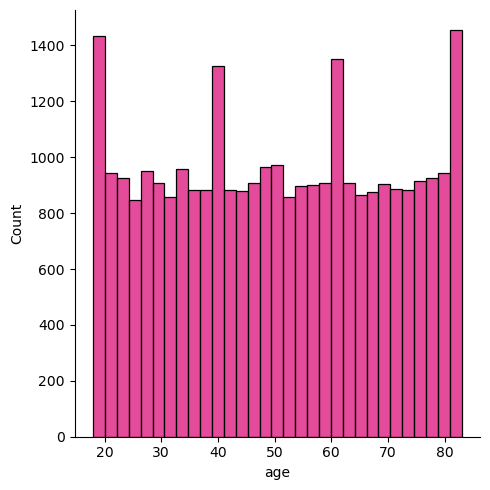

In [7]:
#visualization for age
sns.displot(data['age'], color = "#db0f79")


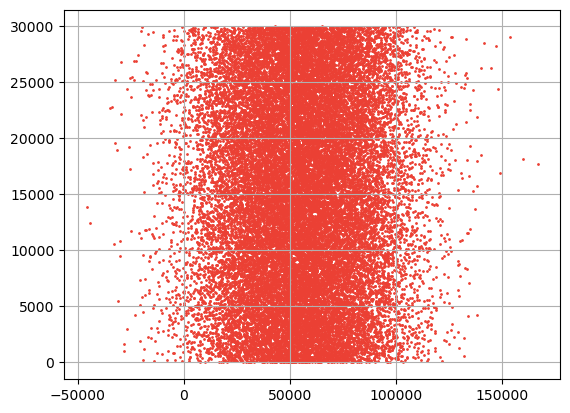

In [9]:
#visualization for annual_income
x = data.annual_income
y = data.id
plt.scatter(x, y, color='#eb4034', s=1)
plt.grid()

In [10]:
#outliers 

# for annual_income: people that make more the 150k, tend to be the least customers 
# for memeber_level ; most shoppers do not have a membership 



In [11]:
final_data = pd.get_dummies(data, columns = ['gender', 'perf_shop_meth',
                                            'member_level'], drop_first=True )
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30000 non-null  int64  
 1   age                     30000 non-null  int64  
 2   annual_income           30000 non-null  float64
 3   spending_score          30000 non-null  int64  
 4   gender_Bigender         30000 non-null  uint8  
 5   gender_Female           30000 non-null  uint8  
 6   gender_Genderfluid      30000 non-null  uint8  
 7   gender_Genderqueer      30000 non-null  uint8  
 8   gender_Male             30000 non-null  uint8  
 9   gender_Non-binary       30000 non-null  uint8  
 10  gender_Polygender       30000 non-null  uint8  
 11  perf_shop_meth_InStore  30000 non-null  uint8  
 12  perf_shop_meth_Online   30000 non-null  uint8  
 13  member_level_none       30000 non-null  uint8  
 14  member_level_platinum   30000 non-null

In [12]:
# K means Cluster Creation 
from sklearn.cluster import KMeans 


In [21]:
kmeans = KMeans(n_clusters=2)

#I initially had chosen a cluster of 3, but noticed that it would not 
#separets the data accuratly according to the label i choose to evealuate
.

In [14]:
kmeans.fit(data.drop(columns=['member_level', 'gender', 'perf_shop_meth']))



KMeans(n_clusters=2)

In [15]:
kmeans.cluster_centers_


array([[1.49492628e+04, 5.03049339e+01, 3.51975944e+04, 6.42723952e+01],
       [1.50521418e+04, 5.06971421e+01, 7.48730429e+04, 6.44270129e+01]])

In [16]:
#evaluation 
def converter(cluster):
    if cluster=='Online':
        return 1
    else:
        return 0
# My data had 3 categorical feautures,thus i used the perf_shop_meth 
#to evaluate the data because it had two distinct outcomes either 
#Instore or Online.



In [17]:
data['Cluster'] = data['perf_shop_meth'].apply(converter)



In [18]:
data.head()


,id,gender,age,annual_income,spending_score,perf_shop_meth,member_level,Cluster
0,1,Female,48,29189.97,90,InStore,none,0
1,2,Female,40,10242.24,39,InStore,gold,0
2,3,Male,71,20388.37,48,InStore,silver,0
3,4,Female,72,57062.15,43,InStore,none,0
4,5,Agender,81,64736.13,44,InStore,gold,0


In [19]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Cluster'],kmeans.labels_))
print(classification_report(data['Cluster'],kmeans.labels_))


[[9756 9614]
 [5283 5347]]
              precision    recall  f1-score   support

           0       0.65      0.50      0.57     19370
           1       0.36      0.50      0.42     10630

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.55      0.50      0.51     30000

